In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dtype = np.dtype('uint32')
path = "../LOFAR_2e_jaars_RP_2022_voor_studenten/Data_Pulsar1/L197621_SAP0_BEAM1_DM12.44_mask.dat"
with open( path, 'rb') as f:
    pulsar_data = np.fromfile(f, dtype)
pulsar_data

array([1235573962, 1235775609, 1235734073, ..., 1236573746, 1236573746,
       1236573746], dtype=uint32)

In [15]:
len(pulsar_data)

69120

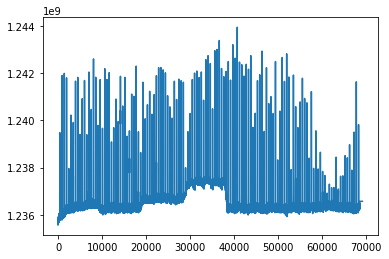

In [19]:
plt.plot(pulsar_data)

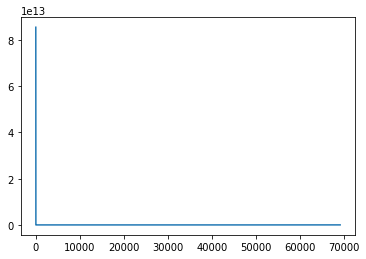

In [16]:
transform = np.fft.fft(pulsar_data)
plt.plot(abs(transform))